In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# negative horizontal wavenumber for westward propagating waves
k = -1
# negative vertical wavenumber for downard propagating waves
m = -1
# angular frequency
w = 1
# time
t = 0

# brunt-vaisala frequency
N = 1

# create a 2d wave field from e^(ikx + imz - wt)
x = np.linspace(-5, 5, 101)
z = np.linspace(-5, 5, 101)
X, Z = np.meshgrid(x, z)

P = np.exp(1j * (k * X + m * Z - w * t))

W = -(k**2) * P / (m * w)

U = k * P / w

POTTMP = 1j * N**2 * k**2 / (m * w**2) * P

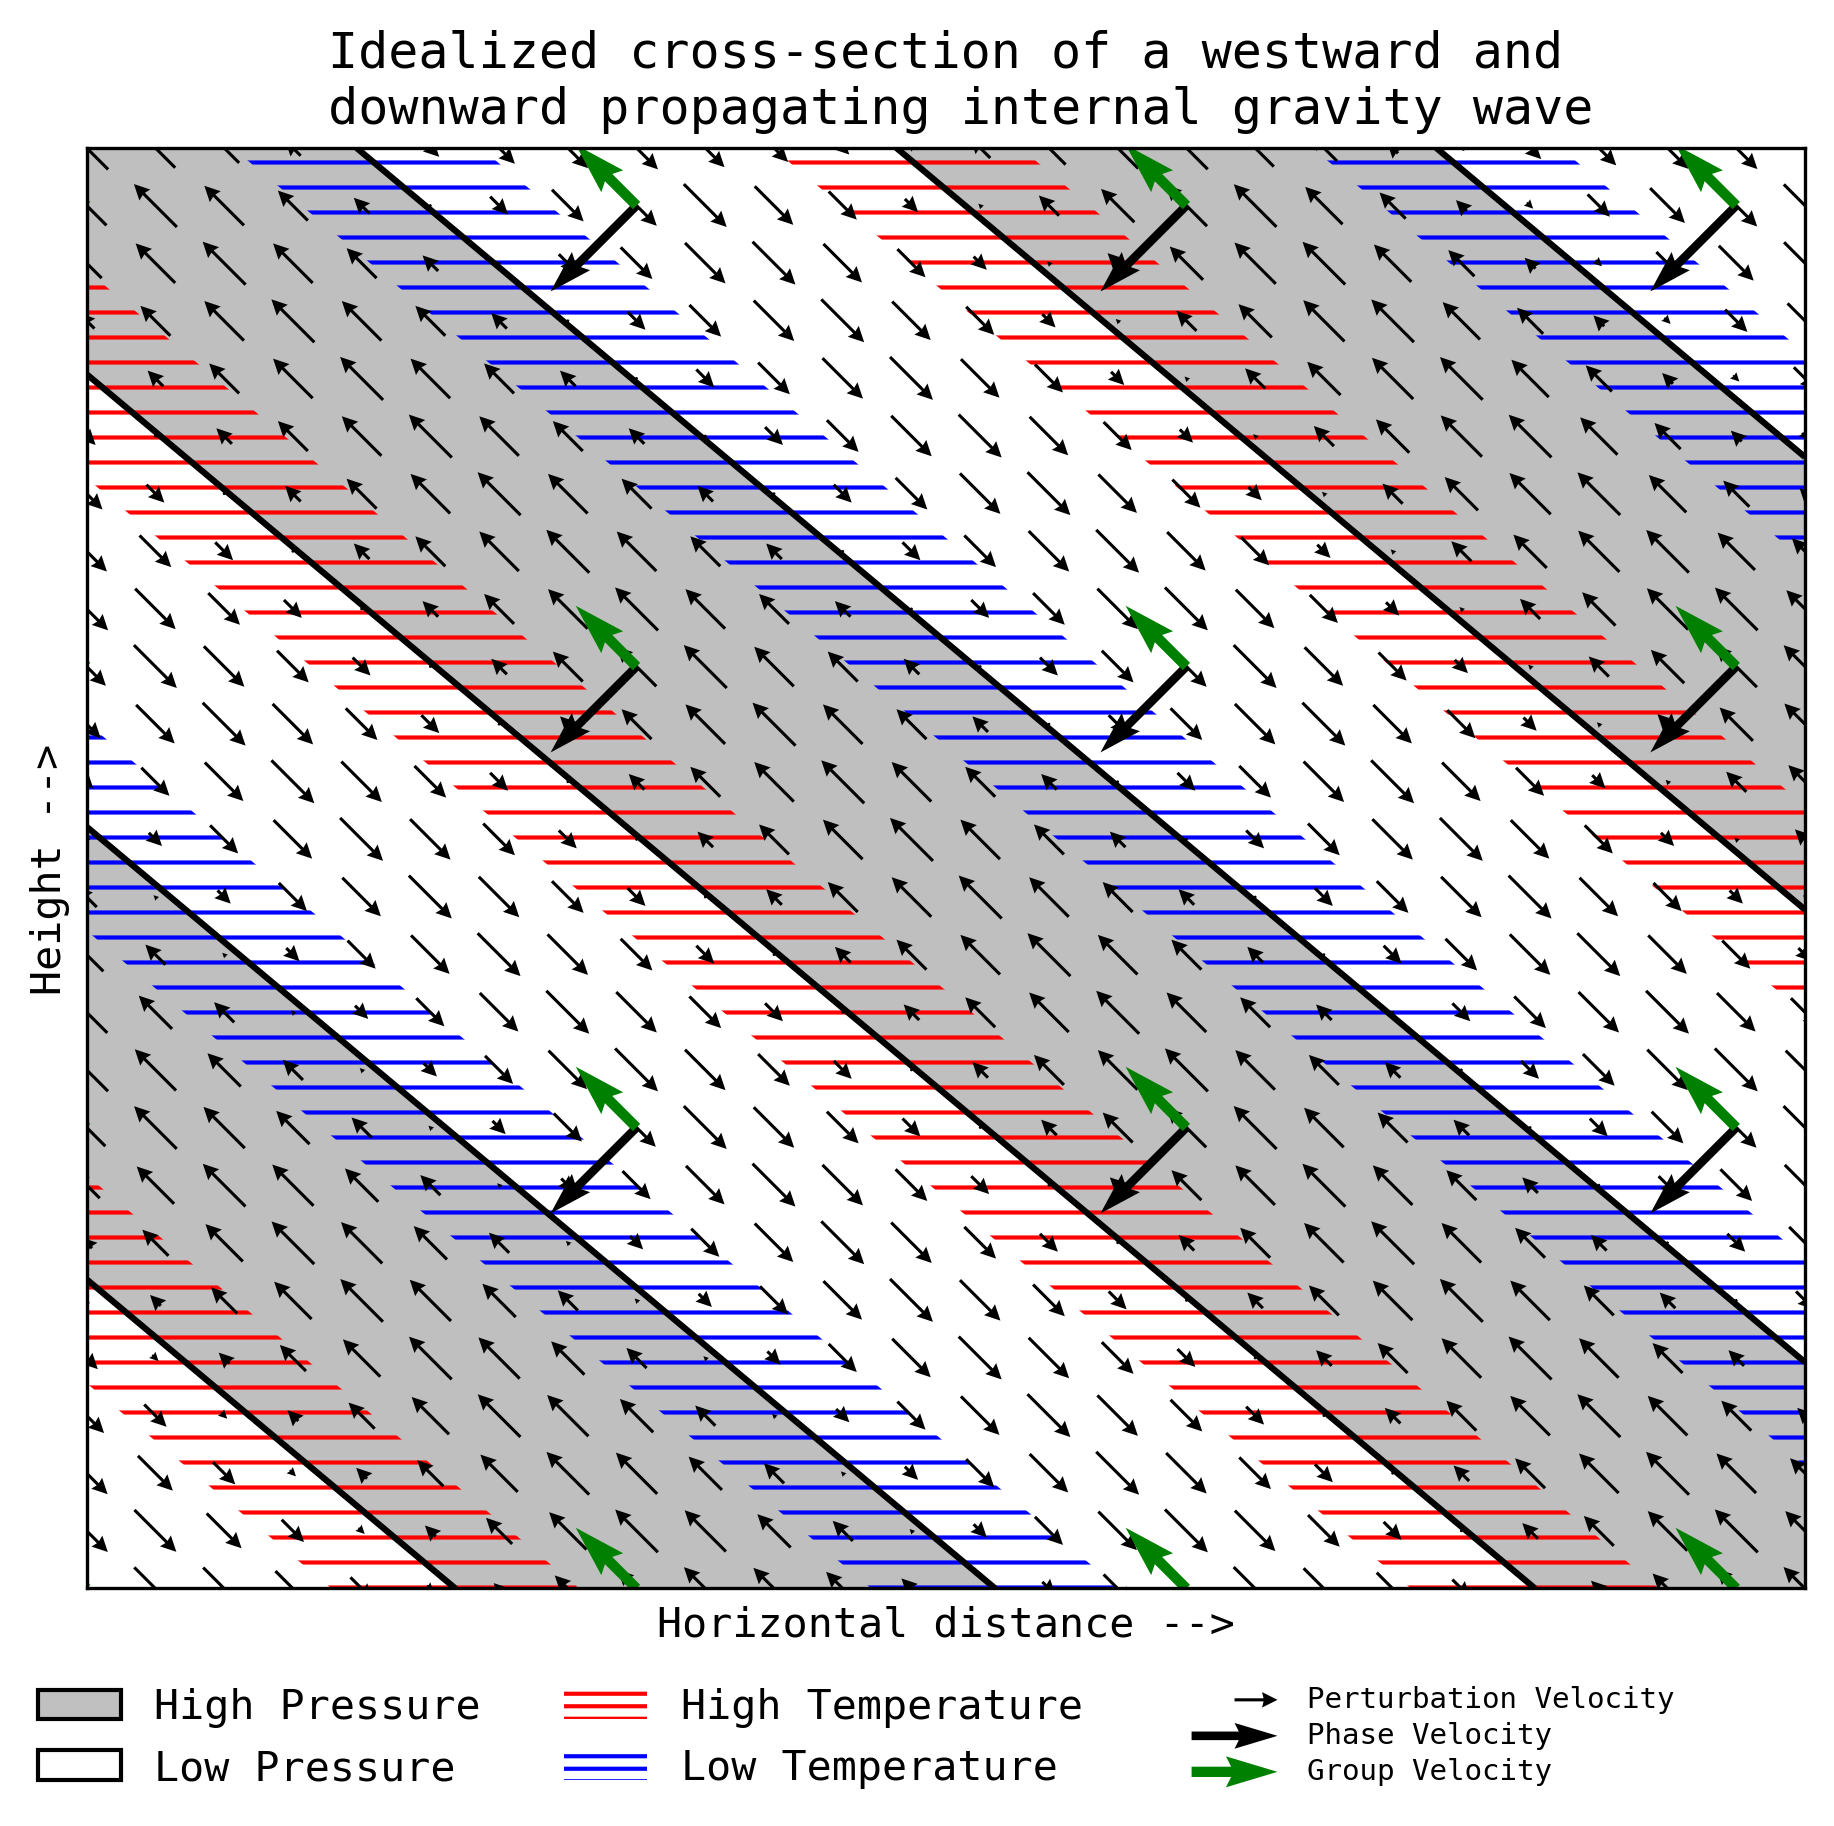

In [3]:
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["font.family"] = "monospace"

cmap_P = LinearSegmentedColormap.from_list("name", ["white", "white", "grey"])
cmap_POTTMP = LinearSegmentedColormap.from_list(
    "name", ["blue", "white", "white", "white", "red"]
)


spacing = 4
fig, ax = plt.subplots(figsize=(6, 6), dpi=300, layout="constrained")
ax.contourf(X, Z, P.real, 1, cmap=cmap_P)
ax.contour(X, Z, P.real, levels=[0], colors="black")

# plot the POTTMP field with red hatch for positive values and blue hatch for negative values
plt.rcParams["hatch.color"] = "r"
ax.contourf(X, Z, POTTMP.real, levels=[0.75, 1], hatches=["--", ""], colors="none")

plt.rcParams["hatch.color"] = "b"
ax.contourf(X, Z, POTTMP.real, levels=[-1, -0.75], hatches=["--", ""], colors="none")

q = ax.quiver(
    X[::spacing, ::spacing],
    Z[::spacing, ::spacing],
    U.real[::spacing, ::spacing],
    W.real[::spacing, ::spacing],
    scale=40,
    cmap="gray",
    width=0.0018,
    pivot="middle",
    headwidth=5,
)

# make quiver of phase velocity as blunt solid arrows
q_phase = ax.quiver(
    X[:: spacing * 8, :: spacing * 8],
    Z[:: spacing * 8, :: spacing * 8],
    k,
    m,
    scale=20,
    color="black",
    width=0.005,
    pivot="tail",
)

# make quiver of group velocity as green solid arrows
q_group = ax.quiver(
    X[:: spacing * 8, :: spacing * 8],
    Z[:: spacing * 8, :: spacing * 8],
    np.sign(k) * N * m**2 / (k**2 + m**2) ** (3 / 2),
    -np.sign(k) * N * k * m / (k**2 + m**2) ** (3 / 2),
    scale=10,
    color="green",
    width=0.006,
    pivot="tail",
)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("Horizontal distance -->")
ax.set_ylabel("Height -->")

ax.set_title(
    "Idealized cross-section of a westward and\n downward propagating internal gravity wave"
)

# create the legend manually from patches
legend_elements = [
    mpatches.Patch(facecolor="silver", edgecolor="black", label="High Pressure"),
    mpatches.Patch(facecolor="white", edgecolor="black", label="Low Pressure"),
    mpatches.Patch(
        facecolor="none", hatch="----", edgecolor="red", lw=0, label="High Temperature"
    ),
    mpatches.Patch(
        facecolor="none", hatch="----", edgecolor="blue", lw=0, label="Low Temperature"
    ),
]

fig.legend(handles=legend_elements, loc="outside lower left", framealpha=0, ncol=2)

ax.quiverkey(
    q,
    0.7,
    0.065,
    1,
    "Perturbation Velocity",
    labelpos="E",
    coordinates="figure",
    fontproperties={"size": 7},
)

ax.quiverkey(
    q_phase,
    0.7,
    0.045,
    1,
    "Phase Velocity",
    labelpos="E",
    coordinates="figure",
    fontproperties={"size": 7},
)

ax.quiverkey(
    q_group,
    0.7,
    0.025,
    0.5,
    "Group Velocity",
    labelpos="E",
    coordinates="figure",
    fontproperties={"size": 7},
)

# ax.text(
#     0,
#     -0.01,
#     "Gerardo A. Rivera Tello\nATMO600 HW3",
#     transform=ax.transAxes,
#     fontsize=6,
#     ha="left",
#     va="top",
# )

# Animation

In [4]:
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams["font.family"] = "monospace"

cmap_P = LinearSegmentedColormap.from_list("name", ["white", "white", "grey"])
cmap_POTTMP = LinearSegmentedColormap.from_list(
    "name", ["blue", "white", "white", "white", "red"]
)

k_dict = {-1: "westward", 1: "eastward"}
m_dict = {-1: "downward", 1: "upward"}


def make_plot(fig, ax, X, Z, P, W, U, POTTMP, k, m, i=0):
    spacing = 4
    ax.contourf(X, Z, P[i].real, 1, cmap=cmap_P)
    ax.contour(X, Z, P[i].real, levels=[0], colors="black")

    # plot the POTTMP field with red hatch for positive values and blue hatch for negative values
    plt.rcParams["hatch.color"] = "r"
    ax.contourf(
        X,
        Z,
        POTTMP[i].real,
        levels=[
            np.round(np.quantile(POTTMP, 0.75).real, 2),
            np.round(POTTMP.max().real, 2),
        ],
        hatches=["--", ""],
        colors="none",
    )

    plt.rcParams["hatch.color"] = "b"
    ax.contourf(
        X,
        Z,
        POTTMP[i].real,
        levels=[
            np.round(POTTMP.min().real, 2),
            np.round(np.quantile(POTTMP, 0.25).real, 2),
        ],
        hatches=["--", ""],
        colors="none",
    )

    q = ax.quiver(
        X[::spacing, ::spacing],
        Z[::spacing, ::spacing],
        U[i].real[::spacing, ::spacing],
        W[i].real[::spacing, ::spacing],
        scale=40,
        cmap="gray",
        width=0.0018,
        pivot="tail",
        headwidth=5,
    )

    # make quiver of phase velocity as blunt solid arrows
    q_phase = ax.quiver(
        X[:: spacing * 8, :: spacing * 8],
        Z[:: spacing * 8, :: spacing * 8],
        k,
        m,
        scale=20,
        color="black",
        width=0.005,
        pivot="tail",
    )

    # make quiver of group velocity as blunt solid arrows
    # the np.sign(k) is to make the group velocity point in the right direction
    # as the frequency sign depends only on the sign of k
    q_group = ax.quiver(
        X[:: spacing * 8, :: spacing * 8],
        Z[:: spacing * 8, :: spacing * 8],
        np.sign(k) * N * m**2 / (k**2 + m**2) ** (3 / 2),
        -np.sign(k) * N * k * m / (k**2 + m**2) ** (3 / 2),
        scale=10,
        color="green",
        width=0.006,
        pivot="tail",
    )

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xlabel("Horizontal distance -->")
    ax.set_ylabel("Height -->")

    ax.set_title(
        f"Idealized cross-section of a {k_dict[k]} and\n {m_dict[m]} propagating internal gravity wave"
    )

    # create the legend manually from patches
    legend_elements = [
        mpatches.Patch(facecolor="silver", edgecolor="black", label="High Pressure"),
        mpatches.Patch(facecolor="white", edgecolor="black", label="Low Pressure"),
        mpatches.Patch(
            facecolor="none",
            hatch="----",
            edgecolor="red",
            lw=0,
            label="High Temperature",
        ),
        mpatches.Patch(
            facecolor="none",
            hatch="----",
            edgecolor="blue",
            lw=0,
            label="Low Temperature",
        ),
    ]

    fig.legend(handles=legend_elements, loc="outside lower left", framealpha=0, ncol=2)

    ax.quiverkey(
        q,
        0.7,
        0.065,
        1,
        "Perturbation Velocity",
        labelpos="E",
        coordinates="figure",
        fontproperties={"size": 7},
    )

    ax.quiverkey(
        q_phase,
        0.7,
        0.045,
        1,
        "Phase Velocity",
        labelpos="E",
        coordinates="figure",
        fontproperties={"size": 7},
    )

    ax.quiverkey(
        q_group,
        0.7,
        0.025,
        0.5,
        "Group Velocity",
        labelpos="E",
        coordinates="figure",
        fontproperties={"size": 7},
    )

    # ax.text(
    #     0,
    #     -0.01,
    #     "Gerardo A. Rivera Tello\nATMO600 HW3",
    #     transform=ax.transAxes,
    #     fontsize=6,
    #     ha="left",
    #     va="top",
    # )

In [5]:
def create_wave(k, m, w, t):
    # brunt-vaisala frequency
    N = 1
    # create a 2d wave field from e^1j(kx + mz - wt)
    x = np.linspace(-5, 5, 101)
    z = np.linspace(-5, 5, 101)
    X, Z = np.meshgrid(x, z)

    P = np.exp(1j * (k * X + m * Z - w * t))
    W = -(k**2) * P / (m * w)
    U = k * P / w
    POTTMP = 1j * N**2 * k**2 / (m * w**2) * P

    return X, Z, P, W, U, POTTMP

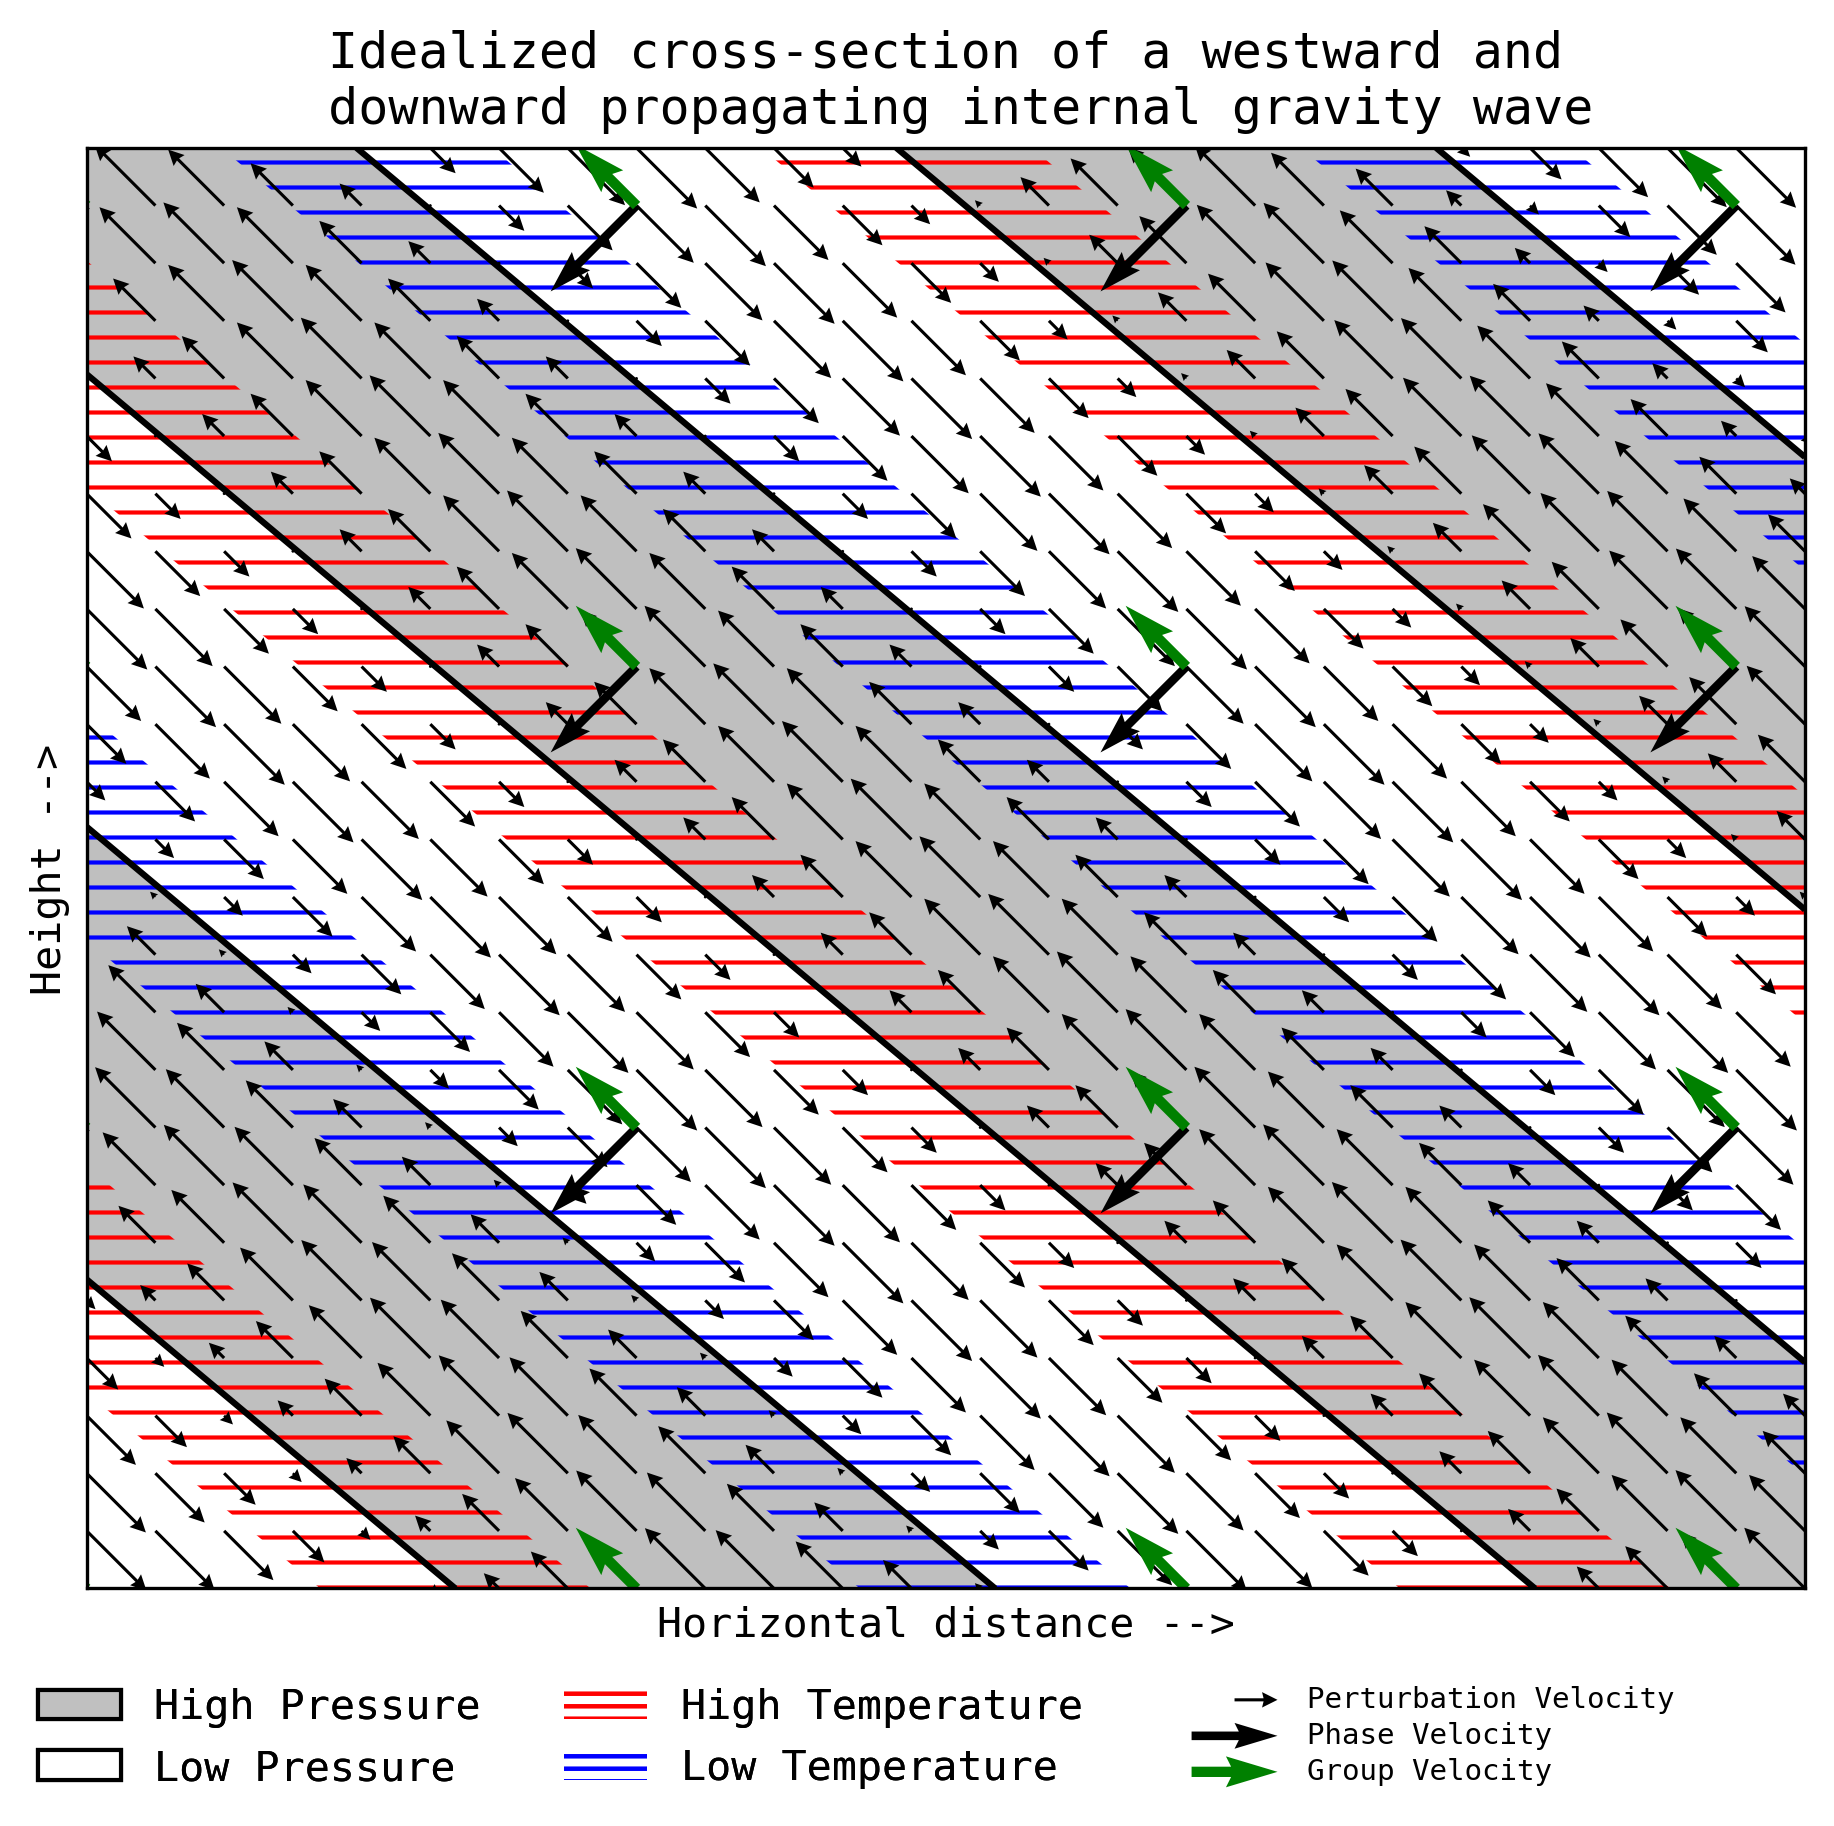

In [6]:
from matplotlib.animation import FuncAnimation

# change any of these parameters to modulate the wave
# negative horizontal wavenumber for westward propagating waves
k = -1
# negative vertical wavenumber for downward propagating waves
m = -1
# brunt-vaisala frequency
N = 1
# angular frequency
# as N is positive, this will have a negative sign if k is negative
w = np.sign(k) * (k * N / (k**2 + m**2) ** 0.5)

# time - this can be an array
# reshape to (nt, 1, 1) to broadcast to the other arrays
t = np.arange(0, 2 * np.pi / w, 0.1).reshape(-1, 1, 1)

X, Z, P, W, U, POTTMP = create_wave(k, m, w, t)

fig, ax = plt.subplots(figsize=(6, 6), dpi=300, layout="constrained")
make_plot(fig, ax, X, Z, P, W, U, POTTMP, k, m)


def animate(i):
    ax.clear()
    make_plot(fig, ax, X, Z, P, W, U, POTTMP, k, m, i)
    return ax


anim = FuncAnimation(fig, animate, frames=len(t), interval=100)

In [7]:
anim.save(f"wave_{k_dict[k]}_{m_dict[m]}.mp4", dpi=300, fps=10)
anim.save(f"wave_{k_dict[k]}_{m_dict[m]}.gif", dpi=300, fps=10)